## **Employee Salaries Analysis**

### Import Necessaty Libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

### Read dataset

In [6]:
df = pd.read_csv("../data/employee_data.csv")
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000.0,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000.0,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000.0,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000.0,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000.0,USA,Asian,0


### Change values of some columns

In [7]:
def get_education_name(level):
    if level == 0:
        return 'High School'
    elif level == 1:
        return 'Bachelor Degree'
    elif level == 2:
        return 'Master Degree'
    elif level == 3:
        return 'Phd'
    else:
        return np.nan

def get_senior_name(num):
    if num == 0:
        return 'No'
    elif num == 1:
        return 'Yes'
    else:
        return np.nan


df['Education Level'] = df['Education Level'].apply(lambda x: get_education_name(x))
df['Senior'] = df['Senior'].apply(lambda x: get_senior_name(x))
df.head()
    

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,Bachelor Degree,Software Engineer,5.0,90000.0,UK,White,No
1,28.0,Female,Master Degree,Data Analyst,3.0,65000.0,USA,Hispanic,No
2,45.0,Male,Phd,Manager,15.0,150000.0,Canada,White,Yes
3,36.0,Female,Bachelor Degree,Sales Associate,7.0,60000.0,USA,Hispanic,No
4,52.0,Male,Master Degree,Director,20.0,200000.0,USA,Asian,No


### Add Year_Range Column

In [8]:
bins = [-1, 5, 10, 20, 30, float('inf')]  # 'inf' to define 40+ value
labels = ['0-5', '6-10', '11-20', '21-30', '40+']

df['Year Range'] = pd.cut(df['Years of Experience'],bins=bins,labels=labels,right=True)
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,Year Range
0,32.0,Male,Bachelor Degree,Software Engineer,5.0,90000.0,UK,White,No,0-5
1,28.0,Female,Master Degree,Data Analyst,3.0,65000.0,USA,Hispanic,No,0-5
2,45.0,Male,Phd,Manager,15.0,150000.0,Canada,White,Yes,11-20
3,36.0,Female,Bachelor Degree,Sales Associate,7.0,60000.0,USA,Hispanic,No,6-10
4,52.0,Male,Master Degree,Director,20.0,200000.0,USA,Asian,No,11-20


In [9]:
df[df.isnull().any(axis=1)]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,Year Range


### Function to print bar charts

In [10]:
def print_barchart(labels,values,title,xlabel,ylabel,money=False): 
    plt.figure(figsize=(15, 6))

    plt.bar(labels, values, color='skyblue')

    if (money):
        plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}')) #Improving legibility of y-axis

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.show()


## **Analysis**

### <u>*General Trends*</u>

#### Question 1: What is the average salary across different countries?

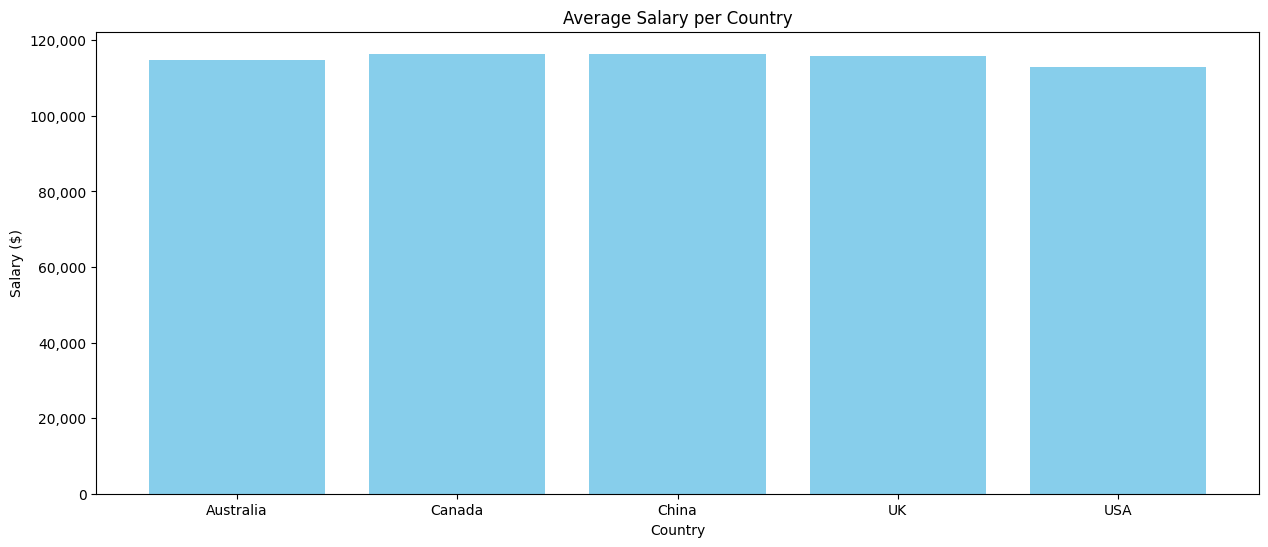

In [11]:
salary_country = df.groupby('Country')['Salary'].mean()
countries = salary_country.index

print_barchart(countries,salary_country.values,'Average Salary per Country','Country','Salary ($)',True)

#### Question 2: What are the average years of experience for the top 5 most common job titles?

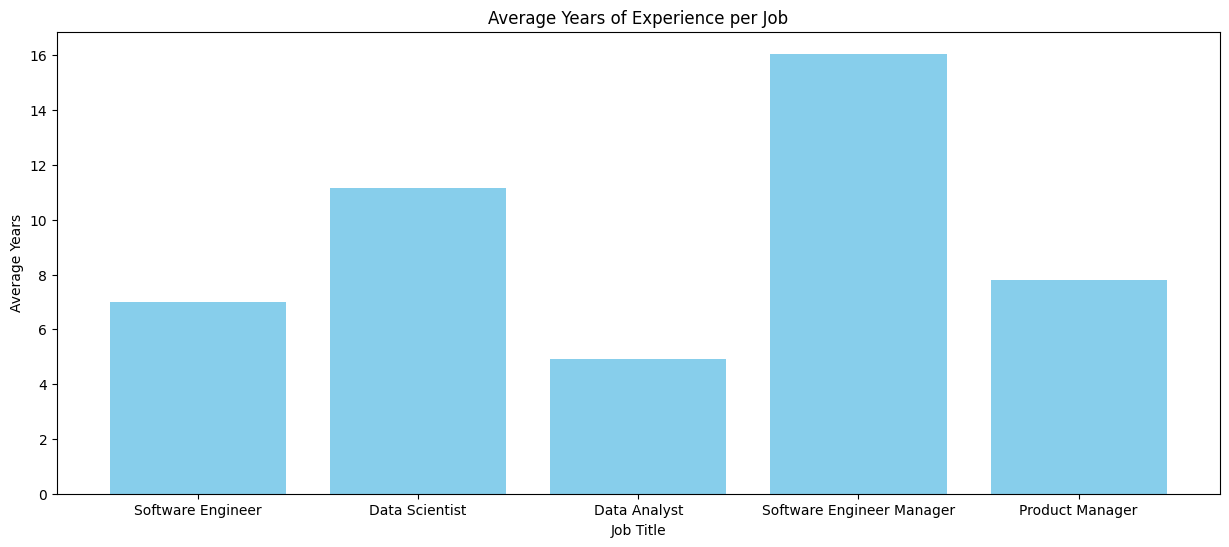

In [12]:

job_group = df.groupby('Job Title').agg(
    Count=('Job Title','count'),
    Avg_Years=('Years of Experience','mean')
).reset_index()

top_5_jobs = job_group.sort_values(by='Count', ascending=False).head(5)

print_barchart(top_5_jobs['Job Title'],top_5_jobs['Avg_Years'],'Average Years of Experience per Job','Job Title','Average Years')



#### Question 3: What is the distribution of education levels among employees?

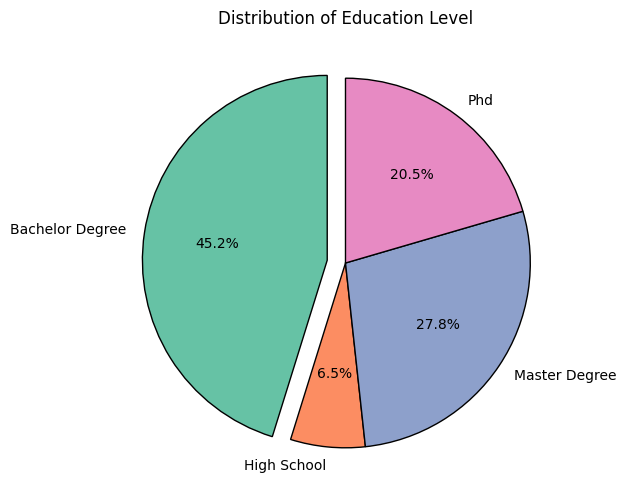

In [13]:
education_group = df.groupby('Education Level').size().reset_index(name='Count')

plt.figure(figsize=(6, 6))  
plt.pie(
    education_group['Count'], 
    labels=education_group['Education Level'], 
    autopct='%1.1f%%',  
    startangle=90,
    explode= (0.1,0,0,0), 
    wedgeprops={'edgecolor': 'black'},     
    colors=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3'],  # Colores personalizados
)

plt.title('Distribution of Education Level')  # Título del gráfico
plt.show()




### <u>*Salary Analysis*</u>

#### Question 4: What is the average salary by gender?

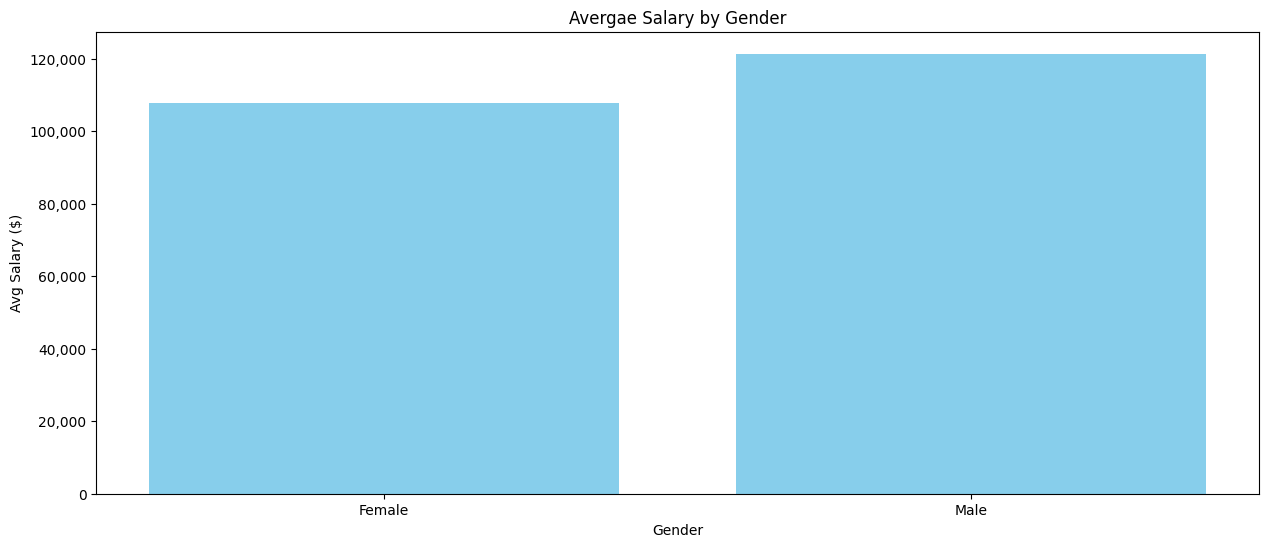

In [14]:
gender_group = df.groupby('Gender')['Salary'].mean()

print_barchart(gender_group.index,gender_group.values,'Avergae Salary by Gender','Gender','Avg Salary ($)',True)

#### Question 5: How does salary correlate with years of experience?

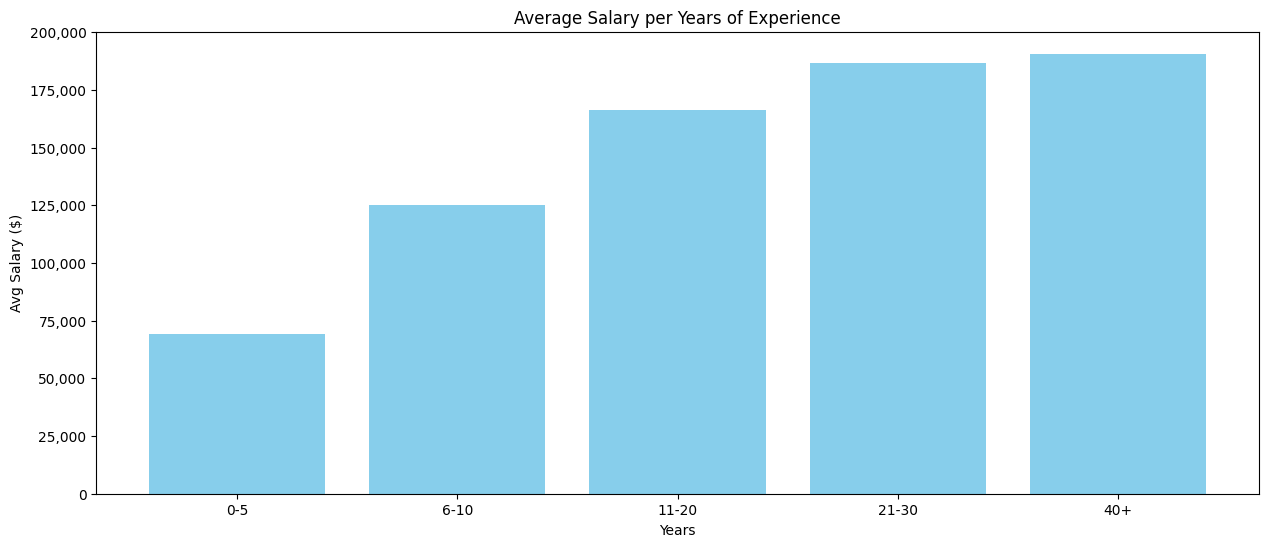

In [15]:
year_group = df.groupby('Year Range',observed=True)['Salary'].mean()

print_barchart(year_group.index,year_group.values,'Average Salary per Years of Experience','Years','Avg Salary ($)',True)

#### Question 6: Do people with master’s degrees earn more than those with bachelor’s degrees?

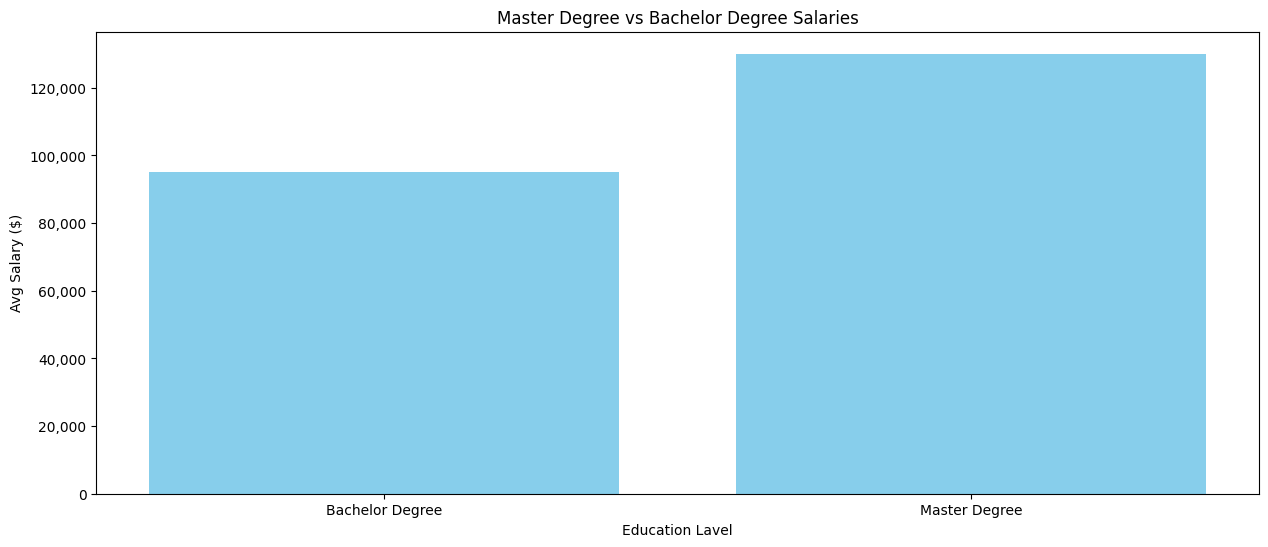

In [16]:
df_temp = df[(df['Education Level'] == 'Master Degree') | (df['Education Level'] == 'Bachelor Degree')]
edu_group = df_temp.groupby('Education Level')['Salary'].mean()

print_barchart(edu_group.index,edu_group.values,'Master Degree vs Bachelor Degree Salaries','Education Lavel','Avg Salary ($)', True)

In [17]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,Year Range
0,32.0,Male,Bachelor Degree,Software Engineer,5.0,90000.0,UK,White,No,0-5
1,28.0,Female,Master Degree,Data Analyst,3.0,65000.0,USA,Hispanic,No,0-5
2,45.0,Male,Phd,Manager,15.0,150000.0,Canada,White,Yes,11-20
3,36.0,Female,Bachelor Degree,Sales Associate,7.0,60000.0,USA,Hispanic,No,6-10
4,52.0,Male,Master Degree,Director,20.0,200000.0,USA,Asian,No,11-20


#### Question 7: Are there differences in education levels across countries?

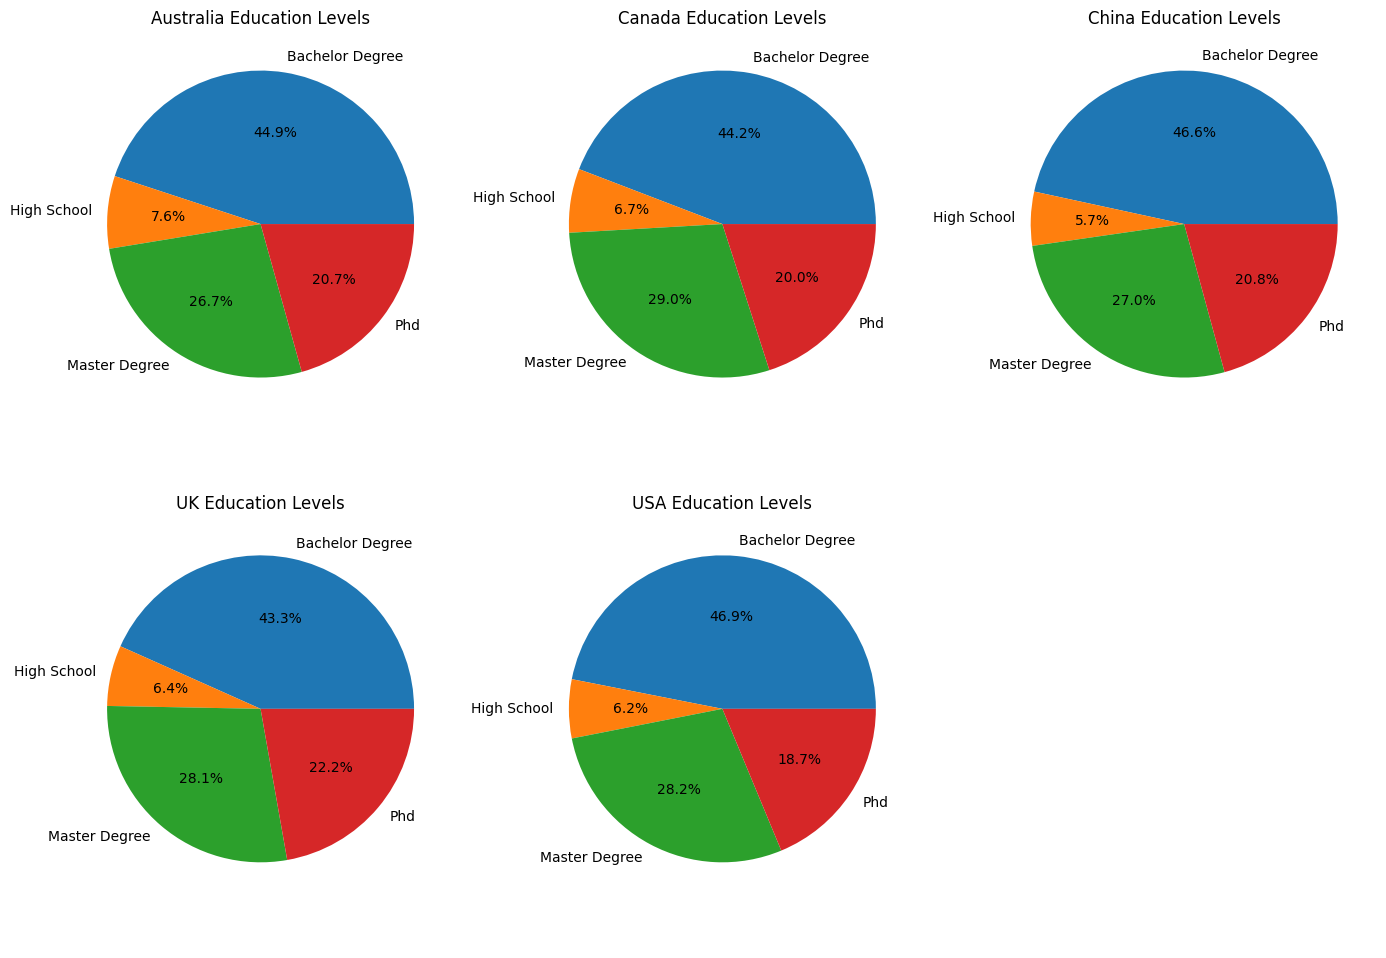

In [18]:
education_counts = df.groupby(['Country', 'Education Level']).size().unstack(fill_value=0)

num_countries = len(education_counts.index)  
num_columns = 3  
num_rows = 2  

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(14, 5 * num_rows)) 

axes = axes.flatten()

# Loop through each country and create a pie chart for the education level distribution
for i, country in enumerate(education_counts.index):
    education_counts.loc[country].plot(kind='pie', autopct='%1.1f%%', ax=axes[i], title=f'{country} Education Levels', legend=False)
    axes[i].set_ylabel('')  # Remove the Y-axis label for clarity

# Hide any unused axes (if the number of countries is not a perfect multiple of columns)
for j in range(i + 1, len(axes)):  
    axes[j].axis('off')  

plt.tight_layout()
plt.show()  
